## Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
from imblearn import under_sampling, over_sampling
np.random.seed(0)
pd.set_option('display.max_columns', 22)

## Load dataset & Preliminary Look

In [2]:
# Load dataset
df = pd.read_csv('fetal_health.csv')

In [3]:
# view dataset
print(df.shape)
df.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# renaming columns
df.rename(columns = {'baseline value':'baseline_heart_rate', 'prolongued_decelerations': 'prolonged_decelerations', 'percentage_of_time_with_abnormal_long_term_variability':'abnormal_long_term_variability'}, inplace=True)
df.columns

Index(['baseline_heart_rate', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'abnormal_long_term_variability', 'mean_value_of_long_term_variability',
       'histogram_width', 'histogram_min', 'histogram_max',
       'histogram_number_of_peaks', 'histogram_number_of_zeroes',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance', 'histogram_tendency', 'fetal_health'],
      dtype='object')

**Data dictionary**

* **`baseline_heart_rate`:** FHR baseline (beats per minute)
* **`accelerations`:** Number of accelerations per second
* **`fetal_movement`:** Number of fetal movements per second
* **`uterine_contractions`:** Number of uterine contractions per second
* **`light_decelerations`:** Number of light decelerations per second
* **`severe_decelerations`:** Number of severe decelerations per second
* **`prolongued_decelerations`:** Number of prolonged decelerations per second
* **`abnormal_short_term_variability`:** Percentage of time with abnormal short term variability
* **`mean_value_of_short_term_variability`:** Mean value of short term variability
* **`abnormal_long_term_variability`:** Percentage of time with abnormal long term variability
* **`mean_value_of_long_term_variability`:** Mean value of long term variability 
* **`histogram_width`:** Width of FHR histogram
* **`histogram_min`: Minimum** (low frequency) of FHR histogram
* **`histogram_max`: Maximum** (high frequency) of FHR histogram
* **`histogram_number_of_peaks`:** Number of histogram peaks
* **`histogram_number_of_zeroes`:** Number of histogram zeros
* **`histogram_mode`:** Histogram mode
* **`histogram_mean`:** Histogram mean
* **`histogram_median`:** Histogram median
* **`histogram_variance`:** Histogram variance
* **`histogram_tendency`:** Histogram tendency
* **`fetal_health`: (TARGET)**  Fetal health as assessed by expert obstetrician. 1 (Normal), 2 (Suspect) and 3 (Pathological)

# Exploratory Data Analysis

In [6]:
#check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


In [7]:
# duplicated rows check
duplicate_rows_data = df.duplicated().sum()
print(f"number of duplicate rows: {duplicate_rows_data}")

number of duplicate rows: 13


In [8]:
# drop duplicated rows
df = df.drop_duplicates()

Observation
1. Data contains 2126 rows with 22 columns
2. All data types seem appropriate given the column name & data snippet
3. All data types is float
4. There are no missing values
5. There are 13 duplicate rows

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_heart_rate,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolonged_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


In [10]:
df.columns

Index(['baseline_heart_rate', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'abnormal_long_term_variability', 'mean_value_of_long_term_variability',
       'histogram_width', 'histogram_min', 'histogram_max',
       'histogram_number_of_peaks', 'histogram_number_of_zeroes',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance', 'histogram_tendency', 'fetal_health'],
      dtype='object')

Oservation:

1. Min-max values are mostly making sense.
2. It can be seen that there are 10 columns that explain the pattern of the histogram, the remaining 11 columns explain basic things in evaluating CTG results such as fetal heart rate, variability, acceleration, uterus contraction, and deceleration
3. Fetal heart rate is represented by the `baseline_heart_rate` column, acceleration is represented by the `accelerations` and `fetal_movement` columns, uterine contractions are represented by the `uterine_contractions` column, decelerations are represented by the `light_decelerations`, `severe_decelerations`, and `prolonged_decelerations` columns, deceleration is represented by the ` column abnormal_short_term_variability`, `mean_value_of_short_term_variability`, `abnormal_long_term_variability`, and `mean_value_of_long_term_variability`.
4. `Fetal_health` as target.
5. Based on small differences between the mean and median of the `baseline_value`, `uterine_contractions`, `abnormal_short_term_variability`, `histogram_min`, `histogram_max`, `histogram_mode`, `histogram_mean`, `histogram_median` are symmetrical, it will be confirmed in kde plot.

## Univariate Analysis

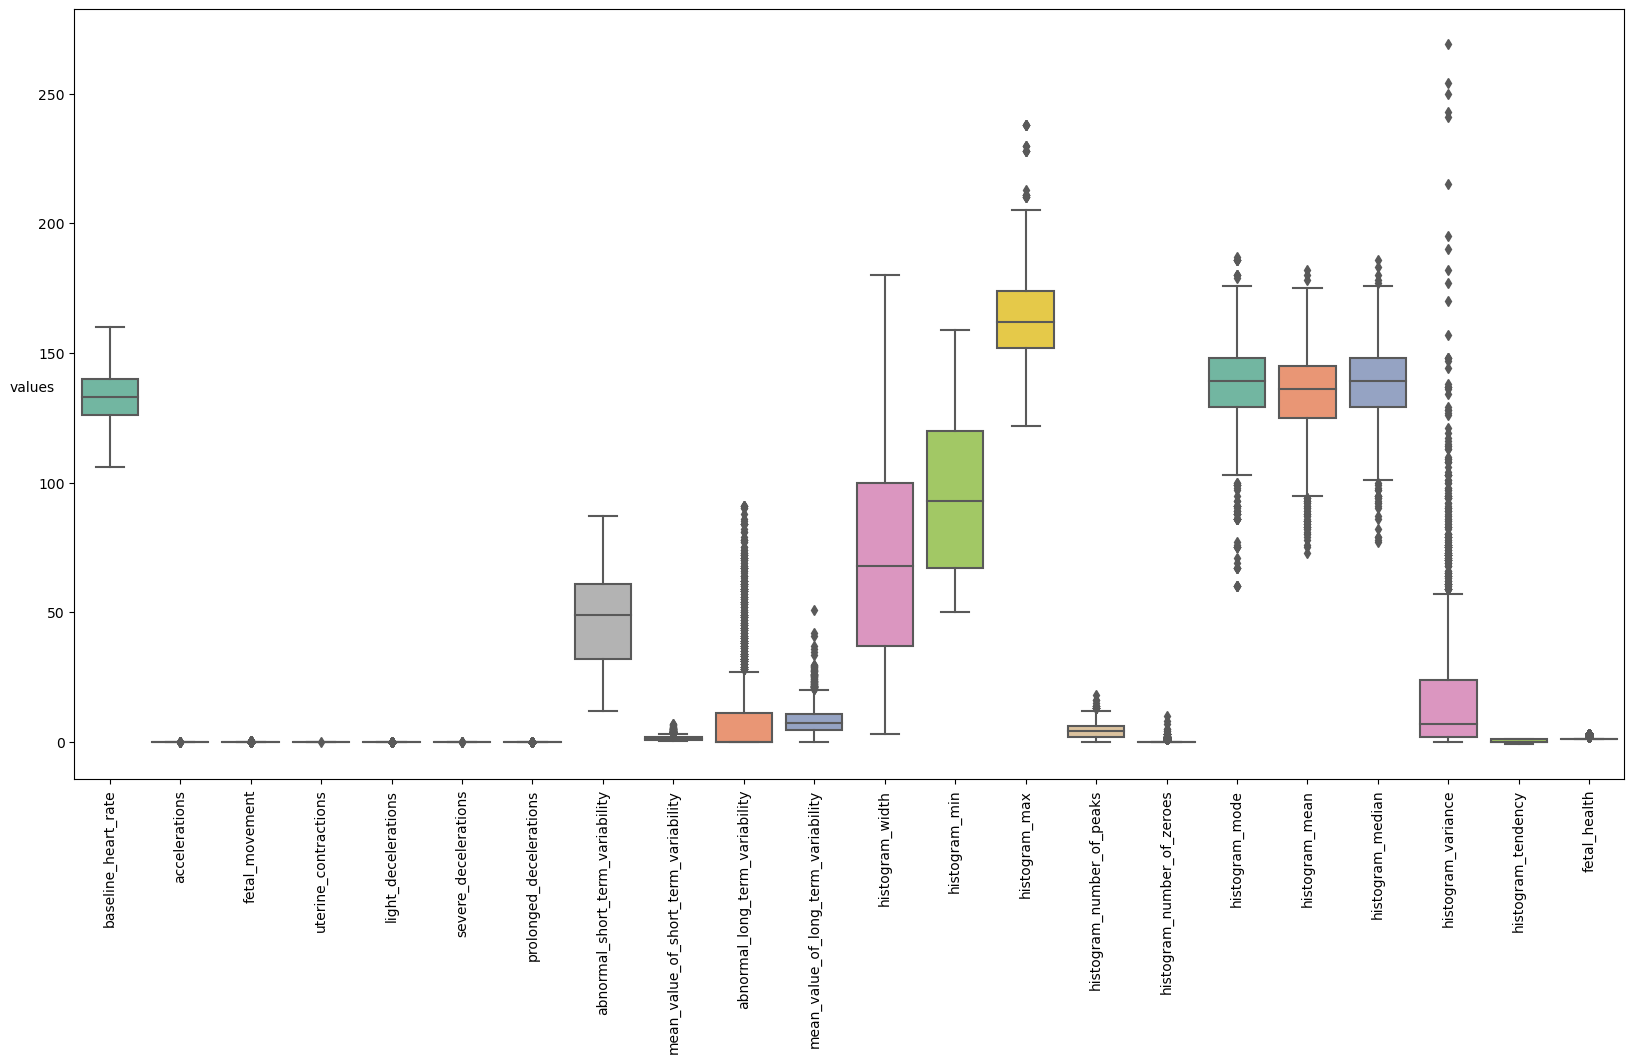

In [11]:
# Outlier checking
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set2")
plt.xticks(rotation=90)
plt.ylabel('values',rotation='horizontal')
plt.show()

Observation

* There are many columns with outliers (this can indicate a lot of columns are skewness)
* All the features are in different ranges. To improve model performance, we can scale it to the same range.

Note
*The basic rules of thumb for the outliers:*
<br>**This is a measurement error or data entry error, correct the error if possible. If you can't fix it, delete the observation**
<br>In our case, this is a CTG report result so it is unlikely that this is a data entry error as it is generated by a calibrated instrument.

<br>**Decision on outliers:**
1. In this case, these data are about the fetus and experts have marked its classification. Let's stick to expert opinion.
2. Assuming that this is a natural part of the population and has been verified by experts, **we shouldn't throw it away**.

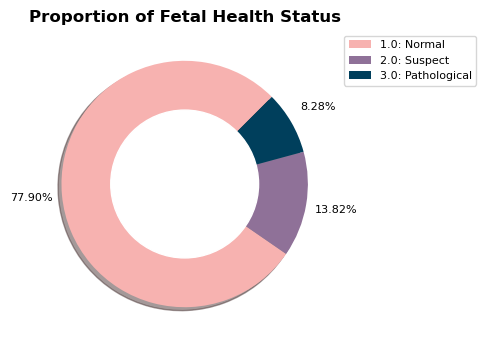

In [12]:
plt.figure(figsize=(4,4))

colours=["#f7b2b0","#8f7198", "#003f5c"]
plt.pie(df['fetal_health'].value_counts(), autopct='%.2f%%', pctdistance = 1.25,startangle=45, textprops={'fontsize': 8},
colors=colours, shadow=True)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Proportion of Fetal Health Status', fontsize=12, fontweight='bold')
plt.legend(['1.0: Normal', '2.0: Suspect', '3.0: Pathological'], bbox_to_anchor=(1, 1), fontsize=8)
plt.show()

**Fetal health status:**
<br> 1 : Normal,<br> 2 : Suspect/at risk <br> 3 : Pathological

In [13]:
# Check amount of unique value of fetal health
proportion_target = df['fetal_health'].value_counts()
proportion_target

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

The majority of fetuses in this dataset are **healthy** as many as **1646 (77.9%)**, then fetuses **suspect** are as many as **292 (13.82%)**, and at least **pathological** fetuses are as many as **175 (8.28%)**.

I will change the target to binary, where `fetal_health` 1.00 will be changed to 0 which means **normal** and `fetal_health` 2.00 and 3.00 will be changed to 1 which means **at risk**

In [14]:
# feature engineering target

df['fetal_health'] = df['fetal_health'].replace({1:0, 2:1, 3:1})
df['fetal_health'] = df['fetal_health'].astype(int)
df['fetal_health'].value_counts()

0    1646
1     467
Name: fetal_health, dtype: int64

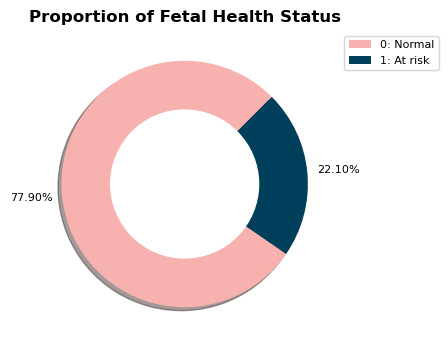

In [15]:
plt.figure(figsize=(4,4))

col=["#f7b2b0","#003f5c"]
plt.pie(df['fetal_health'].value_counts(), autopct='%.2f%%', pctdistance = 1.25,startangle=45, textprops={'fontsize': 8},
colors=col, shadow=True)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Proportion of Fetal Health Status', fontsize=12, fontweight='bold')
plt.legend(['0: Normal', '1: At risk'], bbox_to_anchor=(1, 1), fontsize=8)
plt.show()

- Now, We have a binary `fetal_health` column, with the proportion of healthy fetuses of **1646 (77.90%)** and fetuses at risk of **467 (22.10%)**
-Target columns is imbalance, we can handle it to improve model performance

In [16]:
# attrive feature columns
features = ['baseline_heart_rate', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

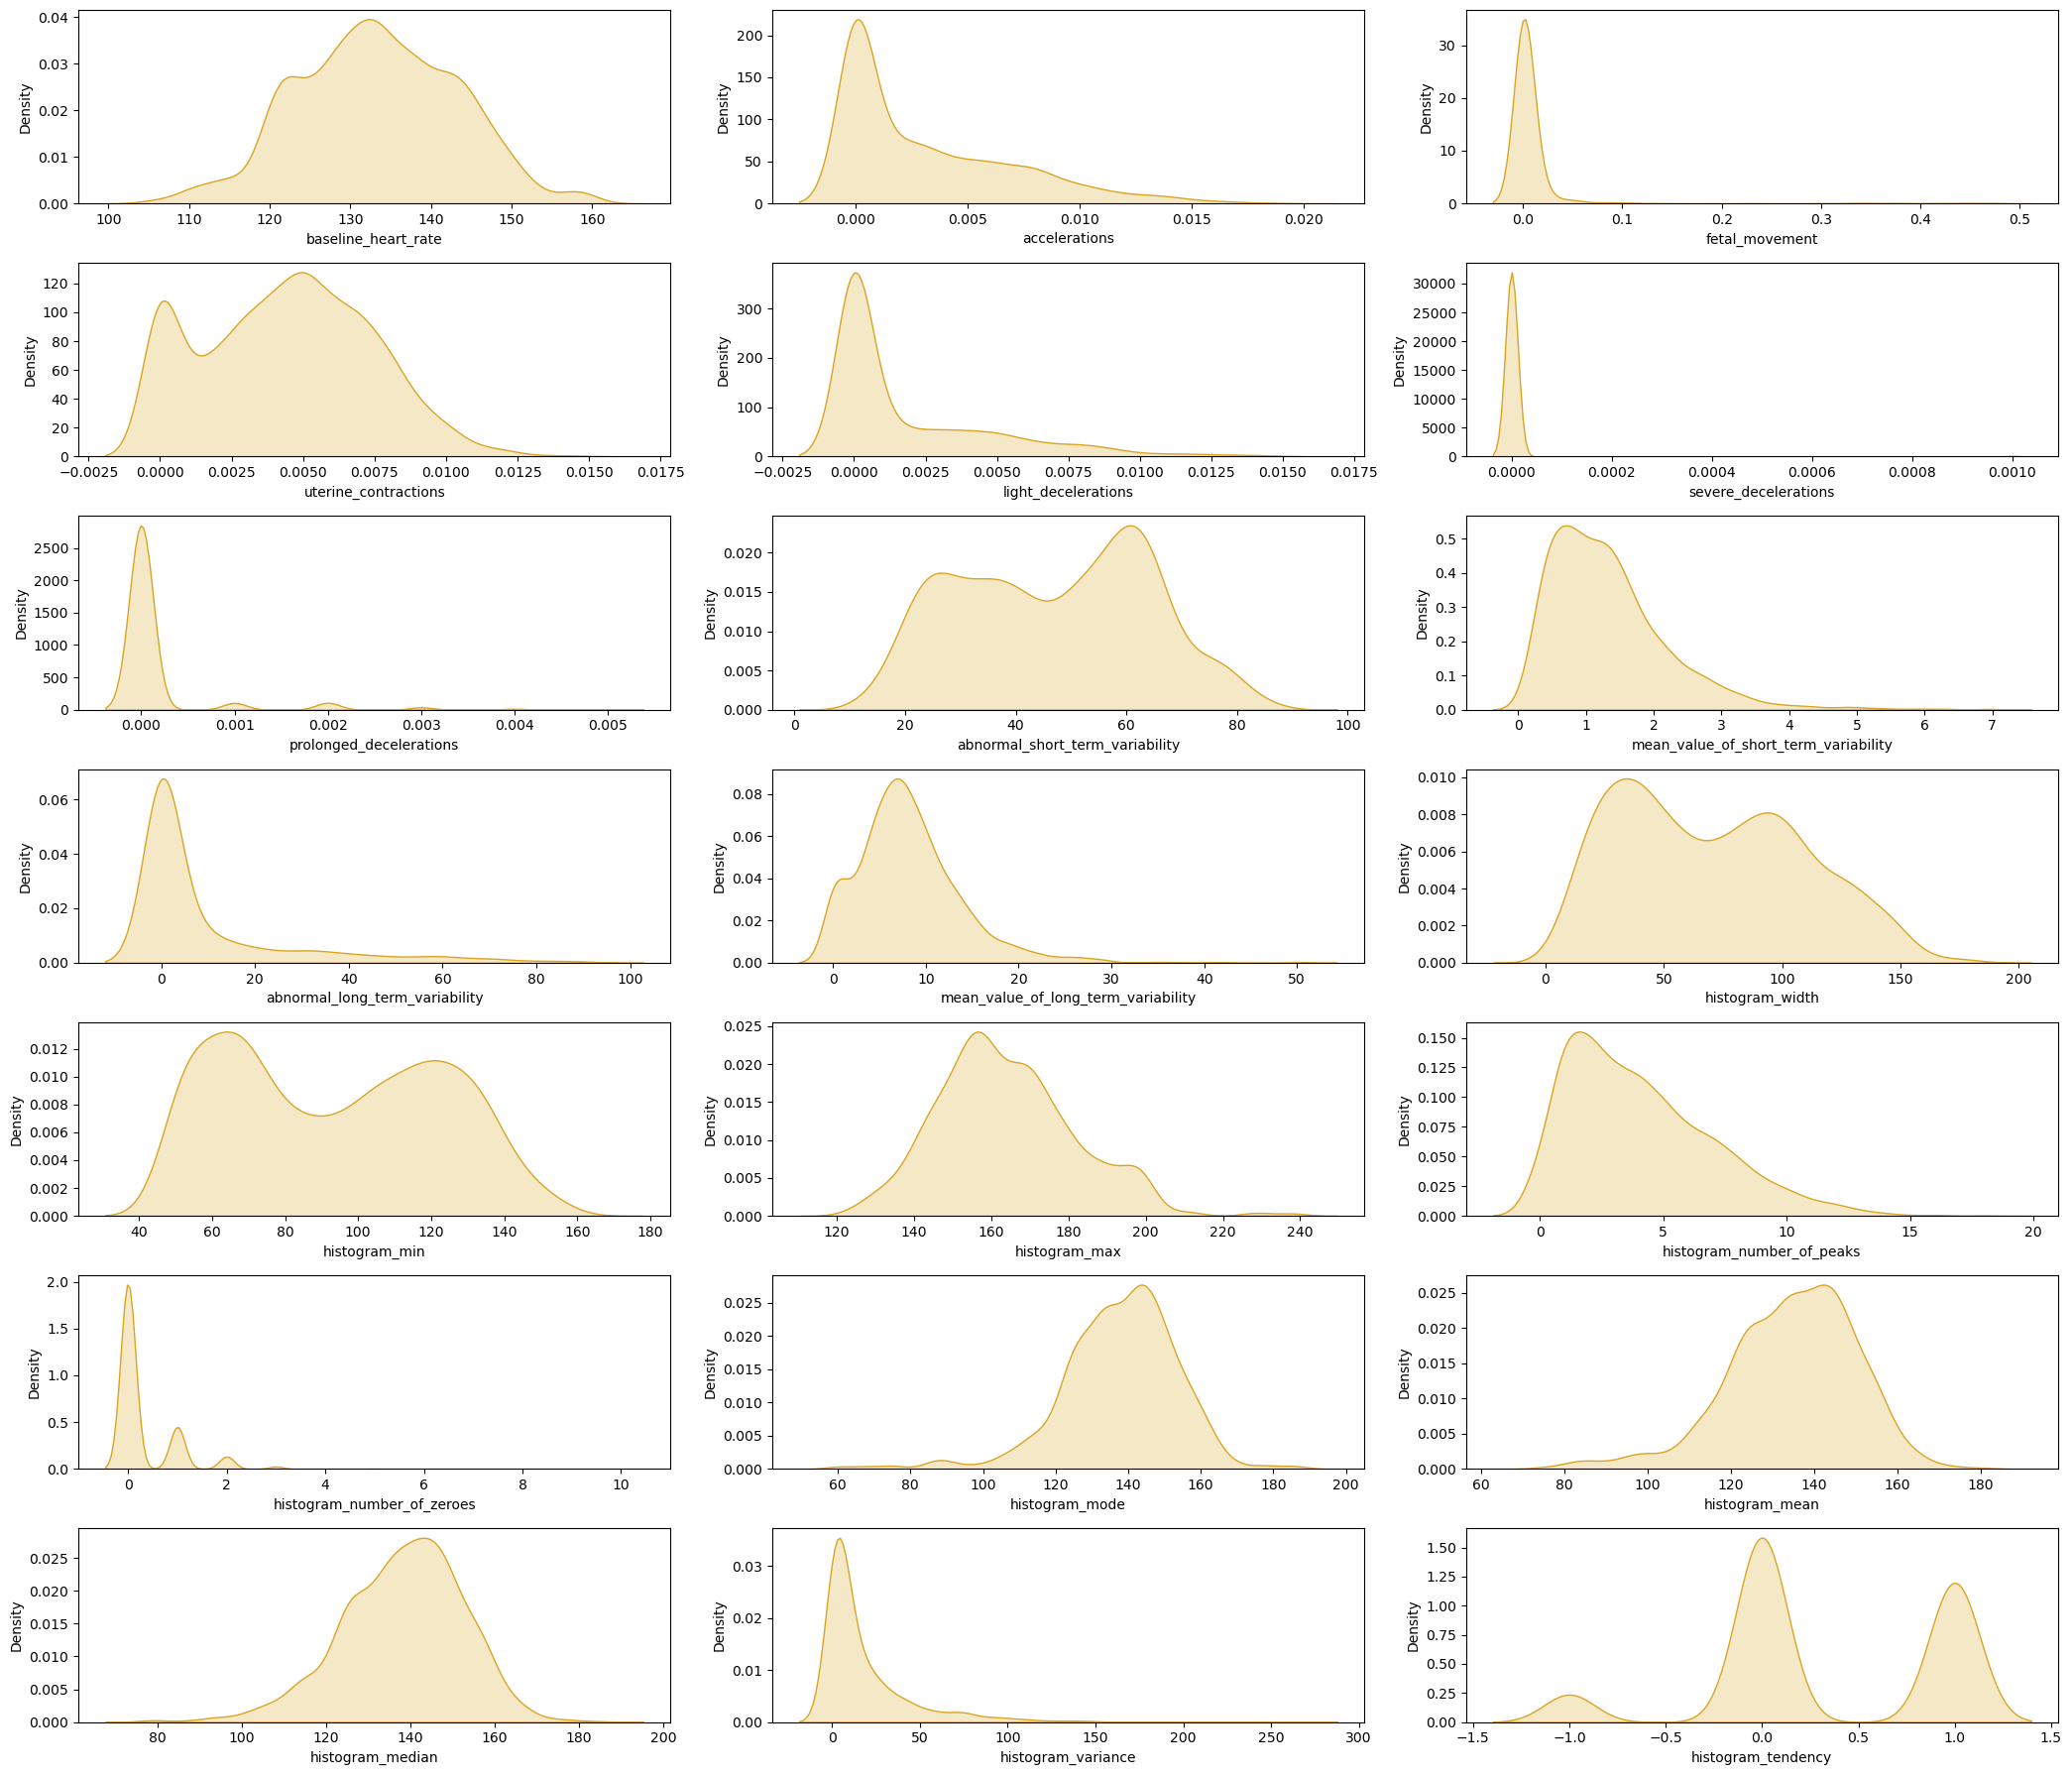

In [17]:
# kde plot for each feature
plt.figure(figsize=(21,18))

for i in range(0, len(features)):
    plt.subplot(7, 3, i+1)
    sns.kdeplot(x=df[features[i]], color= 'goldenrod', fill=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

1. Of the 8 columns predicted to be symmetrically distributed, only `baseline_heart_rate`, `histogram_max`, `histogram_mode`, `histogram_mean`, `histogram_median` are close to symmetrical
2. The `uterine_contractions`, `abnormal_short_term_variability`, `histogram_min` columns have a bimodal distribution, which has two peaks.
3. Apart from the column above, it has a positive skew distribution
4. The `tendecy_histogram`, `histogram_number_of_peaks`, and `histogram_number_of_zeroes` column are discrete numeric type.
5. The trend of the fetus on this data has the following CTG results:

```markdown
- Heart_rate: 135 bpm
- accelerations: 0
- fetal_movement: 0
- uterine_contractions: 0.005
- light_decelerations: 0
- severe_decelerations: 0
- prolonged_decelerations: 0
- abnormal_short_term_variability: 62 %
- mean_value_of_short_term_variability: 0.7
- abnormal_long_term_variability: 0 %
- mean_value_of_long_term_variability: 7
- histogram_width: 40
- histogram_min: 60
- histogram_max: 155
- histogram_number_of_peaks: 2
- histogram_number_of_zeroes: 0
- histogram_mode: 145
- histogram_mean: 142
- histogram_median: 142
- histogram_variance: 1
- histogram_tendency: 0
```

6. Column `abnormal_short_term_variability` is the percentage of time with abnormal short-term variability. The majority of `fetal health status` in this dataset is normal so the `abnormal_short_term_variability` value should be low. This is according to the opinion of the American Academy of Family Physicians (AAFP.org). It is possible that the suspect fetus and pathological fetus have a high `abnormal_short_term_variability value` -> will be confirmed later

## Multivariate & Deep-dive Analysis

<AxesSubplot:>

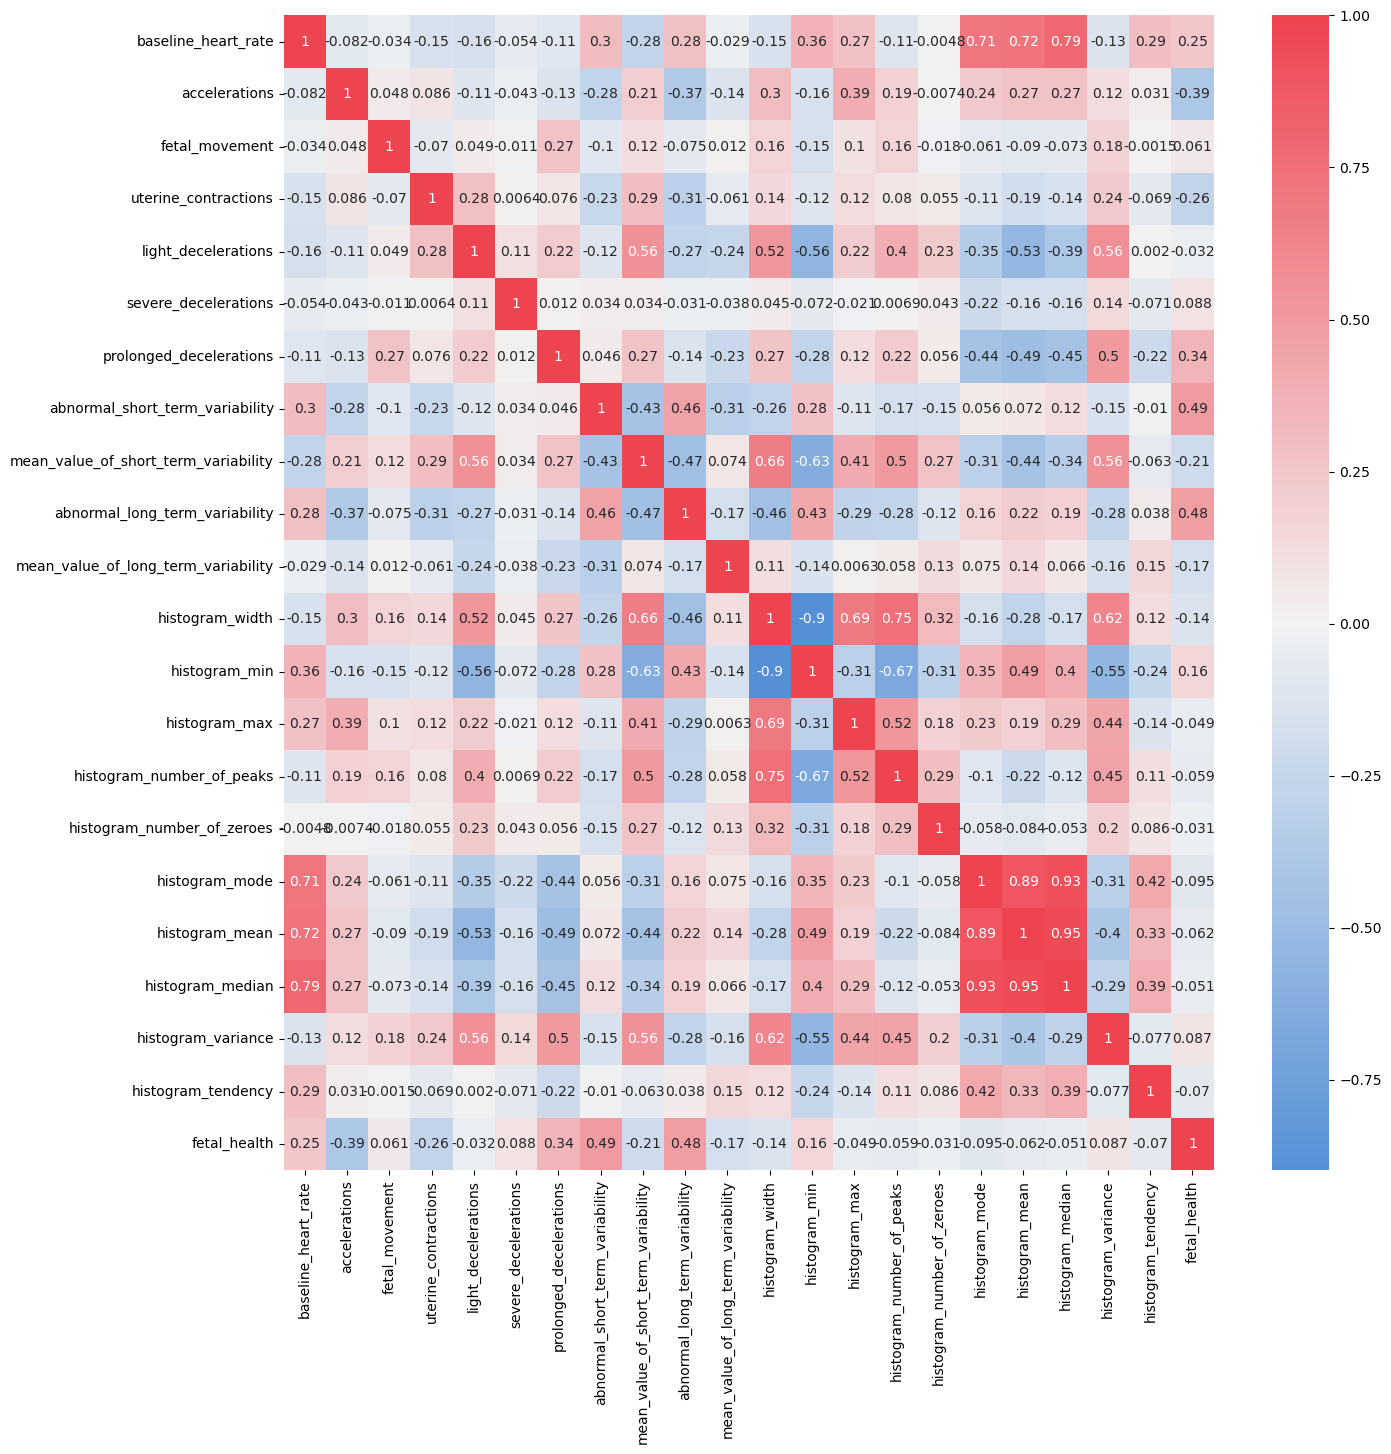

In [18]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Observation:

- From this heatmap correlation it can be said that only the `abnormal_short_term_variability` and `abnormal_long_term_variability` columns have a strong relationship with `fetal_health` and have a positive direction. This means that the higher the value of these two columns, the riskier the fetus' health status tends to be.
- The `baseline_heart_rate` and `prolonged_decelerations` columns have a moderate relationship with `fetal_health` and have a positive direction.
- The `accelerations` and `uterine_contractions` columns have a moderate relationship with `fetal_health` and have a negative direction. The negative direction means that the smaller the value of these two columns, the riskier the fetus' health status tends to be.
- The columns representing the variability values are quite strongly correlated with each other
- `histogram_mode`, `histogram_mean`, `histogram_median` are strongly correlated, this indicates that there is redundant information in the three columns

<AxesSubplot:>

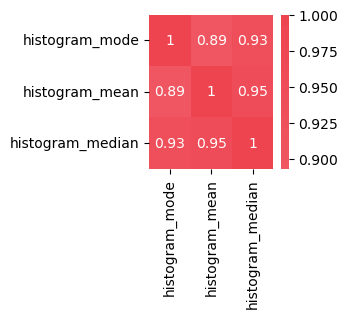

In [19]:
# correlation matrix strongly correlated features
corrmat= df[['histogram_mode', 'histogram_mean', 'histogram_median']].corr()
plt.figure(figsize=(2,2))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

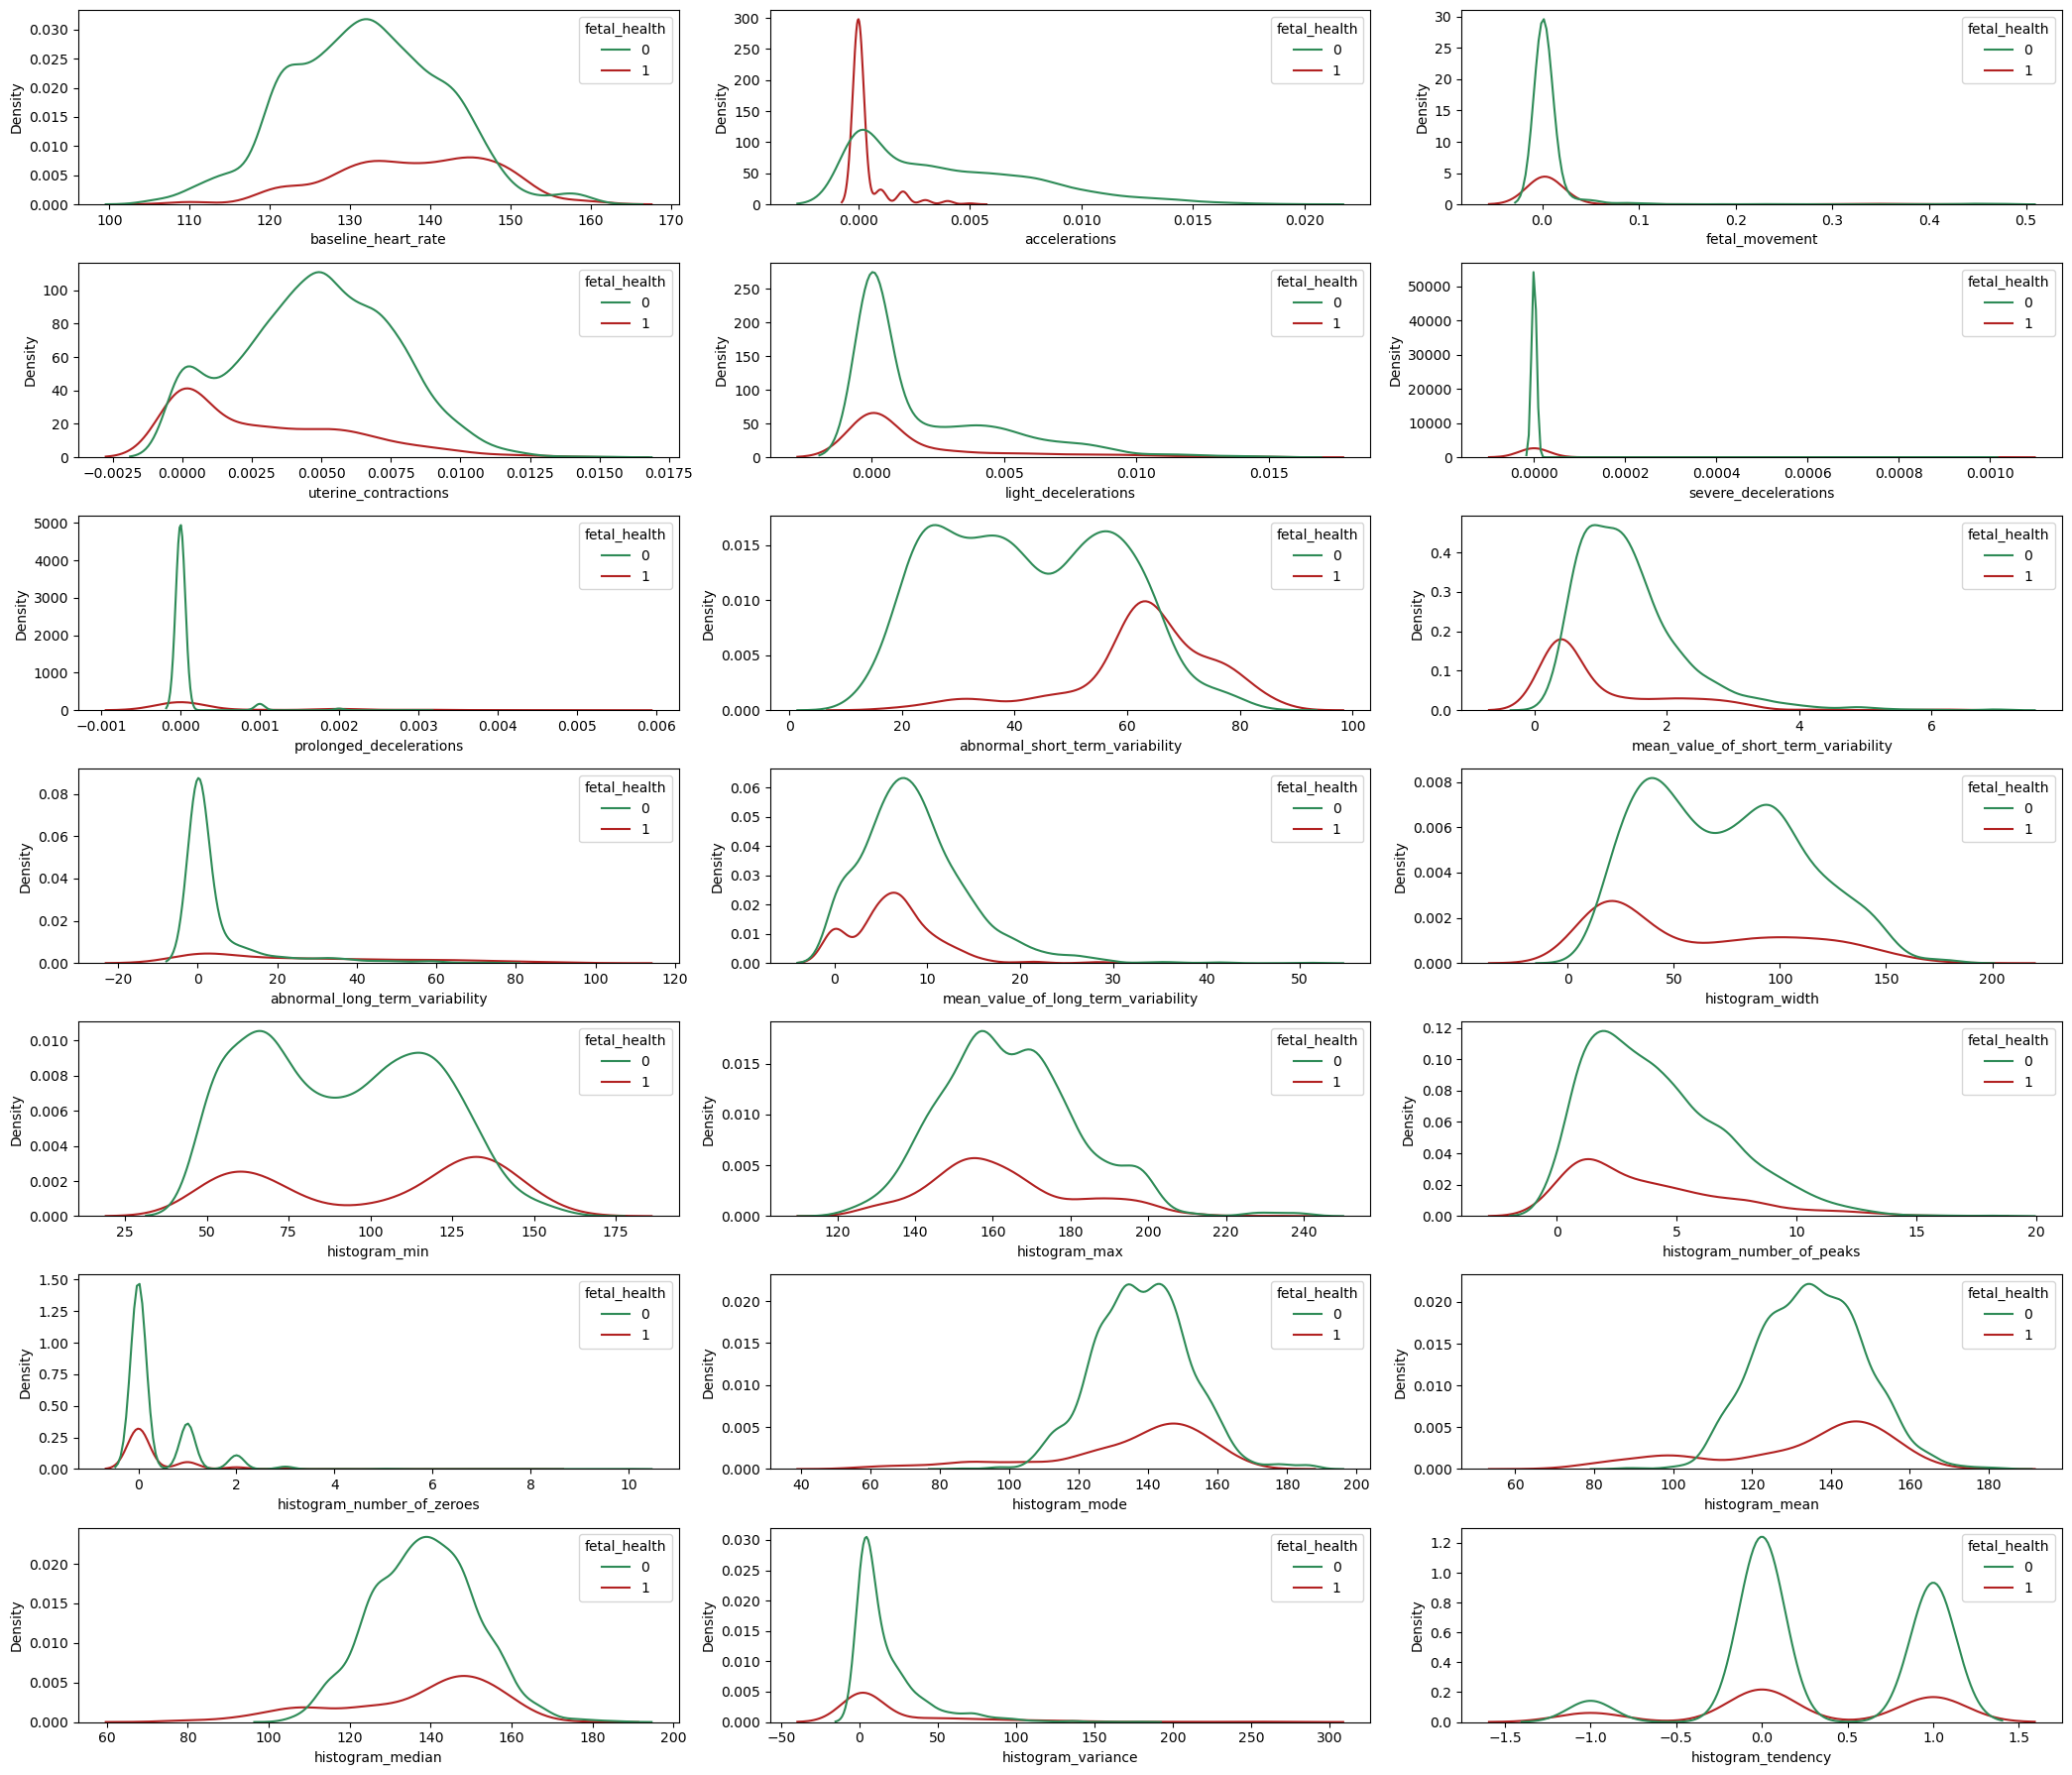

In [20]:
# KDE plot other columns based on fetal_health 
plt.figure(figsize=(21,18))
colours2=["seagreen", "firebrick"]

for i in np.arange(1, len(features)+1):
    plt.subplot(7, 3, i)
    sns.kdeplot(x=df[features[i-1]], hue=df['fetal_health'], palette=colours2)
    plt.xlabel(features[i-1])
    plt.tight_layout()

In [21]:
# abnormal short term variability base on fetal health status
df[['abnormal_short_term_variability','fetal_health']].groupby('fetal_health').mean().reset_index()

,fetal_health,abnormal_short_term_variability
0,0,42.501823
1,1,62.826552


Observation:

- The `baseline_heart_rate` of a healthy fetus is at most 133 bpm while at risk fetuses have a `baseline_heart_rate` which is higher at around 150 bpm
- `uterine_contractions` healthy fetuses have a higher value than risky fetuses
- A healthy fetus has a higher value of fetal `accelerations` per second than a fetus that is at risk
- `prolonged deceleration` of fetuses who are at risk tend to be higher than healthy fetuses
- As discussed above, the `abnormal_short_term_variability` value of a normal fetus will be lower than that of a fetus at risk
- Based on the KDE plot above, the percentage value of `abnormal_short_term_variability` for normal fetuses is most spread at +/- 23%, while fetuses at risk are +/- 65%. Therefore, it can be concluded that the overall high `abnormal_short_term_variability` value (+/- 62%) is caused by a fetus at risk.
- `abnormal long-term variability` in both normal and at-risk fetuses is spread at most at 0%, but at-risk fetuses have a higher percentage of `abnormal long-term variability`
- The `short-term` and `long-term variability` of normal fetuses has a higher value than that of risky fetuses

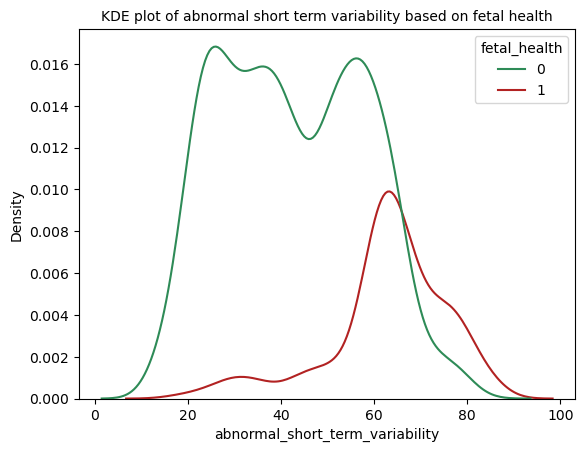

In [22]:
# kde plot abnormal short term variability based on fetal health status
sns.kdeplot(x=df['abnormal_short_term_variability'], hue=df['fetal_health'], palette=colours2)
plt.title('KDE plot of abnormal short term variability based on fetal health', fontsize=10)
plt.show()

**Rahmayanti et al. 2022 states that CTG results are determined by signals from the fetal heartbeat and uterine contractions.**

I want to test whether the above statement applies to this dataset by asking whether there is a difference in the `baseline_heart_rate` & `uterine_contractions` of healthy and at-risk fetuses?

In [23]:
df_copy = df.copy()
df_copy['fetal_health'] = df_copy['fetal_health'].replace({1:'at risk', 0:'normal'}) 

###### baseline_heart_rate

In [24]:
df_copy[['fetal_health','baseline_heart_rate']].groupby('fetal_health').mean().reset_index()

,fetal_health,baseline_heart_rate
0,at risk,137.910064
1,normal,131.998177


There is a difference in the `baseline heart rate` of normal and at-risk fetuses.

**is this statistically significantly different?**

I will answer using hypothesis testing with alpha=0.01.
<br> H0: There is no difference in the average `baseline_heart_rate` value of healthy and at-risk fetuses
<br> H1: There is a difference in the average `baseline_heart_rate` value of healthy and at-risk fetuses

In [25]:
# fhr normal & risk
fhr_normal = df_copy[df_copy['fetal_health']=='normal']['baseline_heart_rate']
fhr_risk = df_copy[df_copy['fetal_health']=='at risk']['baseline_heart_rate']

In [26]:
# t-test
from statsmodels.stats.weightstats import ttest_ind

t_stat, p_val, _ = ttest_ind(fhr_risk, 
                              fhr_normal) 
print(f"t_stat is {t_stat:.4f}")
print(f"p_val is {p_val:.31f}")

t_stat is 11.8334
p_val is 0.0000000000000000000000000000003


p-value: 3e-31 < 0.01 means H0 rejected, **H1 accepted**

**The baseline heart rate of at-risk fetuses is significantly different from that of healthy fetuses**

###### uterine_contractions

In [27]:
df_copy[['fetal_health','uterine_contractions']].groupby('fetal_health').mean().reset_index()

,fetal_health,uterine_contractions
0,at risk,0.002929
1,normal,0.004801


There are differences between normal and risky fetal `uterine contractions`.

**is this statistically significantly different?**

I will answer using hypothesis testing with alpha=0.01.
<br> H0: There is no difference in the average `uterine_contractions` value of healthy and at-risk fetuses
<br> H1: There is a difference in the average `uterine_contractions` value of healthy and at-risk fetuses

In [28]:
# uterine_contractions normal & risk
uc_normal = df_copy[df_copy['fetal_health']=='normal']['uterine_contractions']
uc_risk = df_copy[df_copy['fetal_health']=='at risk']['uterine_contractions']

In [29]:
# t-test
from statsmodels.stats.weightstats import ttest_ind

t_stat, p_val, _ = ttest_ind(uc_normal, 
                              uc_risk) 
print(f"t_stat is {t_stat:.4f}")
print(f"p_val is {p_val:.35f}")

t_stat is 12.5819
p_val is 0.00000000000000000000000000000000005


p-value: 5e-35 < 0.01 means H0 rejected, **H1 accepted**

**Fetal contractions when examining a fetus at risk are significantly different from those in a healthy fetus**

**Note:**

Based on the results of hypothesis testing using the t-test method, it shows that there are differences in `baseline_heart_rate` & `uterine_contractions` for healthy and at-risk fetuses, so this dataset is in accordance with the journal Rahmayanti et al. 2022 which states that CTG results are determined by signals from the fetal heartbeat and uterine contractions.

### Relationship of deceleration columns

In [68]:
df[['light_decelerations','severe_decelerations','prolonged_decelerations','fetal_health']].corr()

,light_decelerations,severe_decelerations,prolonged_decelerations,fetal_health
light_decelerations,1.000000,0.107483,0.224888,-0.032241
severe_decelerations,0.107483,1.000000,0.012303,0.088388
prolonged_decelerations,0.224888,0.012303,1.000000,0.342314
fetal_health,-0.032241,0.088388,0.342314,1.000000


In [31]:
df.severe_decelerations.unique()

array([0.   , 0.001])

The `severe decelerations` column turns out to have two unique values, namely 0 and 0.001

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='light_decelerations', ylabel='prolonged_decelerations'>

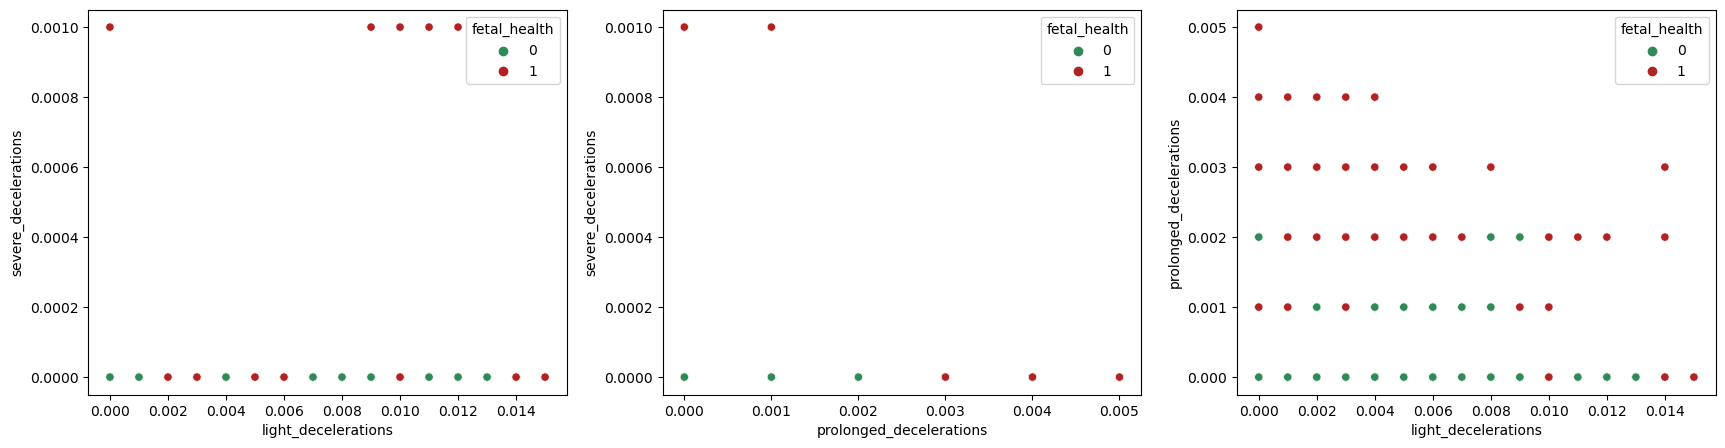

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

sns.scatterplot(df['light_decelerations'], df['severe_decelerations'], hue=df['fetal_health'], ax=ax1, palette=colours2)
sns.scatterplot(df['prolonged_decelerations'], df['severe_decelerations'], hue=df['fetal_health'], ax=ax2, palette=colours2)
sns.scatterplot(df['light_decelerations'], df['prolonged_decelerations'], hue=df['fetal_health'], ax=ax3, palette=colours2)

Observation:

- The deceleration columns are of discrete numeric type, for `severe_decelerations` it has 2 unique values 0 & 0.001
- With the same `light_decelerations` and `prolonged_decelerations` values, a normal fetus will have a lower `severe_decelerations` value than a risky fetus.
- With the same `light_decelerations` value a normal fetus will have a lower `prolonged_decelerations` value than a risky fetus and vice versa.

### Relationship between variability columns

In [33]:
# corr variability columns
df[['abnormal_short_term_variability','mean_value_of_short_term_variability','abnormal_long_term_variability','mean_value_of_long_term_variability','fetal_health']].corr()

,abnormal_short_term_variability,mean_value_of_short_term_variability,abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
abnormal_short_term_variability,1.000000,-0.428973,0.456708,-0.314061,0.491060
mean_value_of_short_term_variability,-0.428973,1.000000,-0.469191,0.073986,-0.205313
abnormal_long_term_variability,0.456708,-0.469191,1.000000,-0.170590,0.484952
mean_value_of_long_term_variability,-0.314061,0.073986,-0.170590,1.000000,-0.171104
fetal_health,0.491060,-0.205313,0.484952,-0.171104,1.000000


<AxesSubplot:xlabel='abnormal_long_term_variability', ylabel='mean_value_of_long_term_variability'>

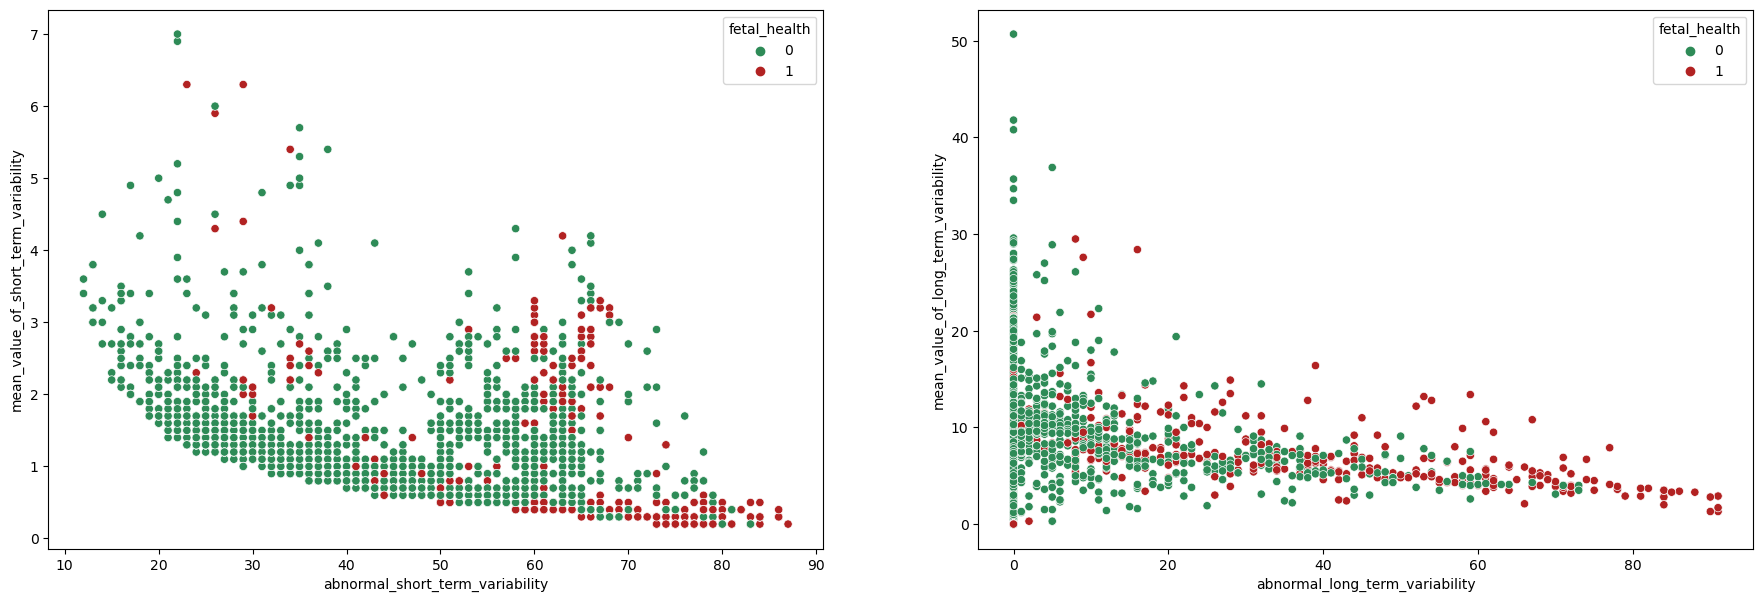

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

sns.scatterplot(data = df, x='abnormal_short_term_variability', y='mean_value_of_short_term_variability', hue='fetal_health', ax=ax1, palette=colours2)
sns.scatterplot(data = df, x='abnormal_long_term_variability', y='mean_value_of_long_term_variability', hue='fetal_health', ax=ax2, palette=colours2)

Observations:

- With the same `mean_value_of_short_term_variability` value, risky fetuses tend to have higher `abnormal_short_term_variability` values than healthy fetuses, likewise for `long term` ones
- The `mean value variability` column has a negative correlation with the `abnormal variability` column for both `long term` and `short term`, but the correlation for `short term` is clearer

## Modeling

### 1. Model Baseline

In [35]:
# spliting features and target
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

In [36]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In this baseline modeling I will use 3 classification models namely, Logistic regression, K-Neirest Neighbors, and Random Forest. I'd like to see the basic performance of the three models that we have

In [37]:
list_model = [LogisticRegression(random_state=42),
              KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=42), 
              RandomForestClassifier(random_state=42),
              GaussianNB(),
              svm.SVC(random_state=42) 
]

df_eval1 = pd.DataFrame(columns = ['Methods','recall train', 'recall test'])

for model in list_model:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]
    
    #recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    df_eval1 = df_eval1.append({'Methods': method, 'recall train':recall_train, 'recall test':recall_test}, ignore_index=True)
    
df_eval1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7948\1580435452.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_eval1 = df_eval1.append({'Methods': method, 'recall train':recall_train, 'recall test':recall_test}, ignore_index=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the 

,Methods,recall train,recall test
0,LogisticRegression,0.636086,0.671429
1,KNeighborsClassifier,0.779817,0.728571
2,DecisionTreeClassifier,0.993884,0.807143
3,RandomForestClassifier,0.996942,0.828571
4,GaussianNB,0.795107,0.778571
5,SVC,0.529052,0.550000


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


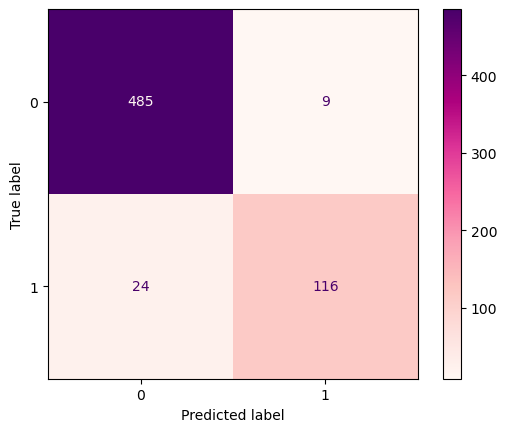

Recall score:  0.8285714285714286


In [38]:
# plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix, auc

# instantiating and fitting random forest model
rf_clf = RandomForestClassifier(random_state=42) 
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

plot_confusion_matrix(rf_clf, X_test, y_test,cmap="RdPu")
plt.show()
print('Recall score: ',recall_score(y_test, y_pred))

Observation:

* In this model I use recall as the main evaluation matrix because I want to reduce False Negatives and maximize the model's performance in detecting fetuses at risk.
* The accuracy evaluation metric is not used because the target column is unbalanced.
* In the baseline model, the best model is random forest on training data and test data, namely with a recall value of 100% on training data and 87.59% on test data. I can say that it is not overfitting, but I will reduce the difference between training performance & testing performance later.
* A recall value of 87.59% means that out of 100 fetuses that were actually at risk, our model was able to detect 87 of them.
* From the confusion matrix above, it can be seen that of the 127 fetuses predicted to be at risk, only 120 fetuses were actually at risk and there were 7 False Positives.
* Additionally, of the 137 fetuses that were actually at risk, our model was able to predict 120 fetuses and missed 17 fetuses, which is a false negative. This score is not good because we are dealing with the health and life of a baby that is at high risk.

In [39]:
# Copy initial dataset
df_base = df.copy()

## 2. Modeling with Preprocessing

#### 1. Multicolinearity

<AxesSubplot:>

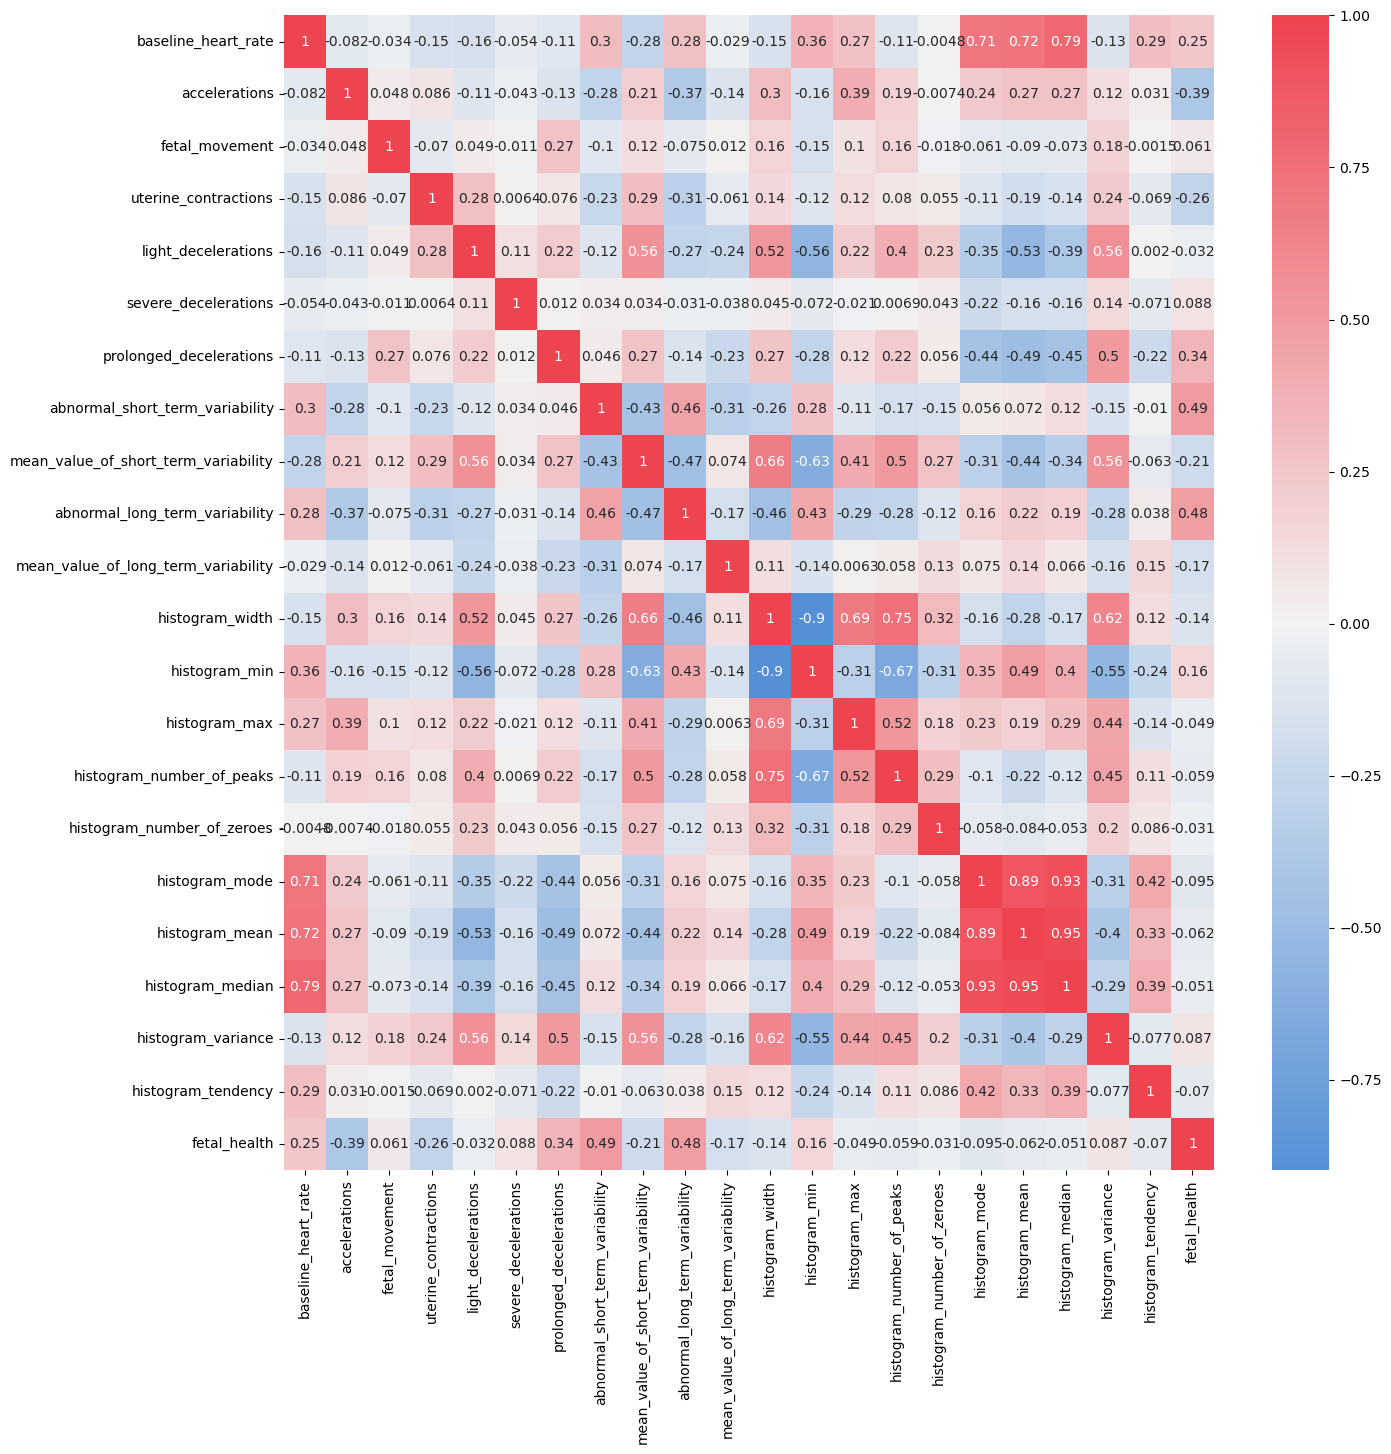

In [40]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Observation:

* The `histogram_mode`, `histogram_mean`, `histogram_median` columns are highly correlated with each other, this indicates that there is redundant information between the three. Therefore, I will drop 2 columns out of the three.
* column `histogram_mode` has the highest correlation with `fetal_health` compared to the other two columns so this column will be maintained

In [41]:
# drop columns which is multicolinearity
df = df.drop(['histogram_mean', 'histogram_median' ], axis=1)
df.head(3)

,baseline_heart_rate,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,73.0,1.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,12.0,0.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,13.0,0.0,0


In [42]:
%%time
# spliting features and target
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

list_model = [LogisticRegression(random_state=42),
              KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=42), 
              RandomForestClassifier(random_state=42),
              GaussianNB(),
              svm.SVC(random_state=42) 
]

df_eval1 = pd.DataFrame(columns = ['Methods','recall train', 'recall test'])

for model in list_model:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]
    
    #recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    df_eval1 = df_eval1.append({'Methods': method, 'recall train':recall_train, 'recall test':recall_test}, ignore_index=True)
    
df_eval1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<timed exec>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axi

Wall time: 1.24 s


<timed exec>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Methods,recall train,recall test
0,LogisticRegression,0.629969,0.650000
1,KNeighborsClassifier,0.782875,0.735714
2,DecisionTreeClassifier,0.993884,0.757143
3,RandomForestClassifier,0.996942,0.814286
4,GaussianNB,0.776758,0.742857
5,SVC,0.516820,0.507143


Note:

- Performa model setelah multicolinearity handling ternyata tidak membaik, oleh karena itu tahap pre-processing ini tidak diambil dan data frame dikembalikan ke bentuk awal
- Tidak adanya peningkatan performa pada random forest kemungkinan karena model ini adalah model ensemble yang mempunyai dasar decision tree dengan prinsip pembelahan cabang sehingga kurang efektif

In [43]:
# re-compile the initial dataset
df = df_base.copy()

In [44]:
# re-spliting features and target
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

# re-spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

#### 3. Scaling

In [45]:
#Set up a standard scaler for the features
col_names = list(X_train.columns)
s_scaler = StandardScaler()

X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

In [46]:
# Set to be a data_frame for boxplot
df_sc = pd.DataFrame(X_train, columns=col_names)

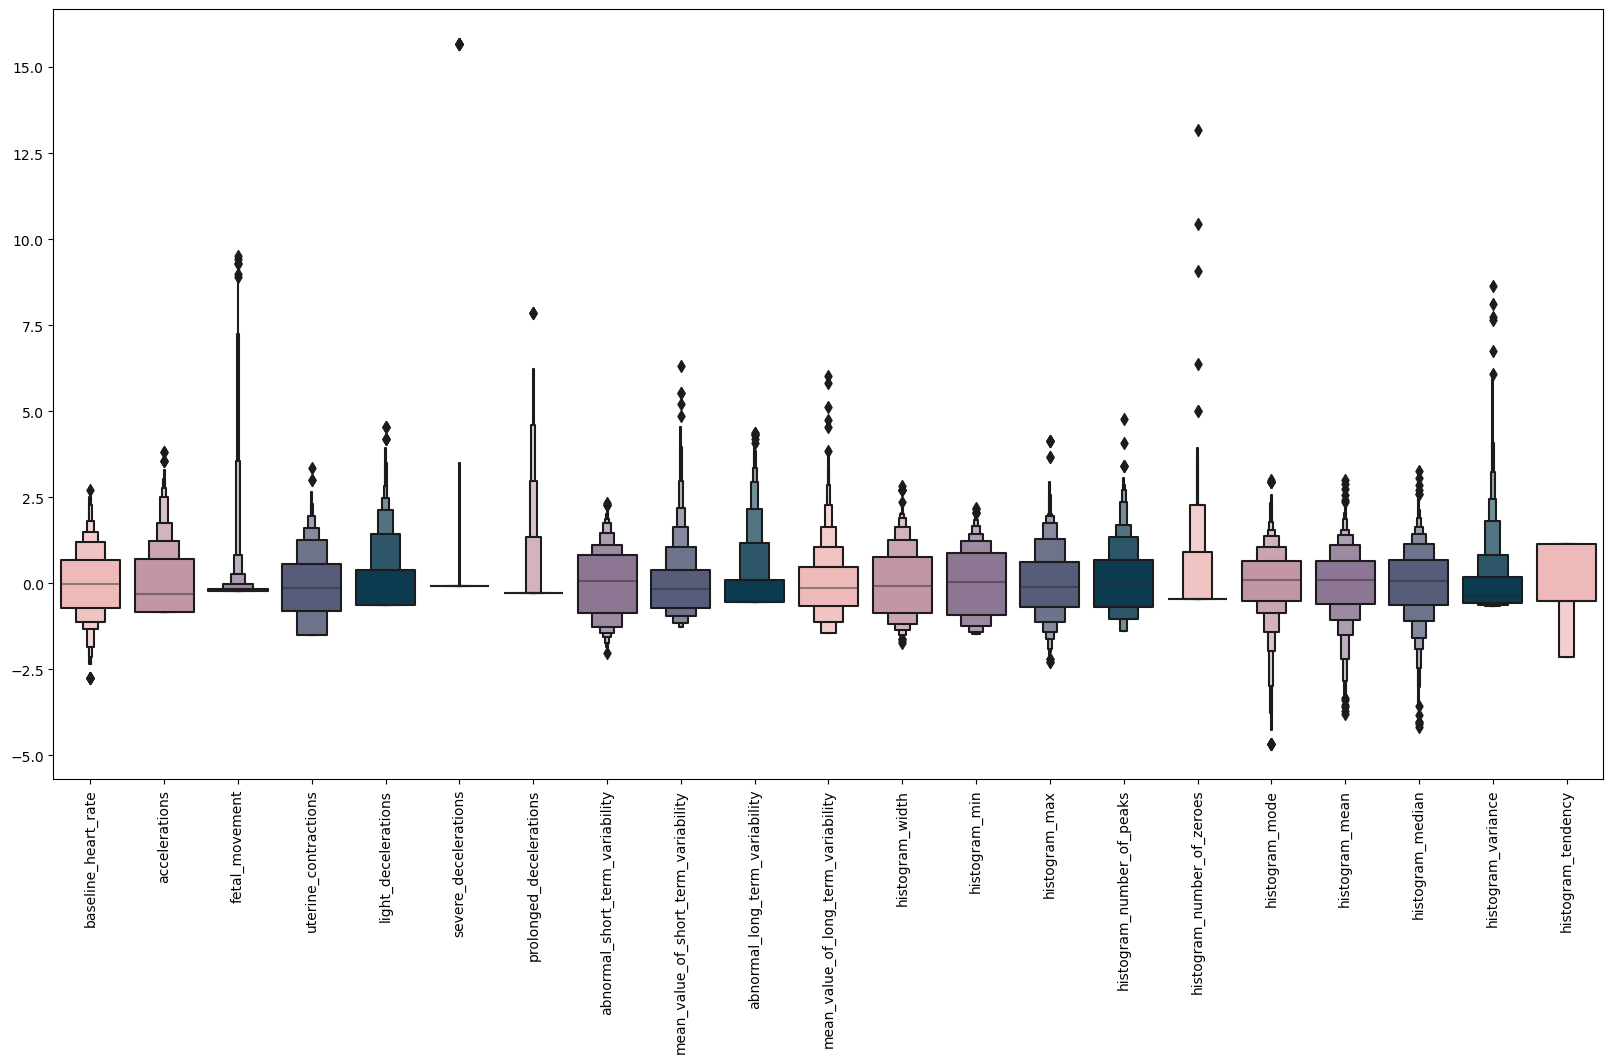

In [47]:
#looking at the scaled features
plt.figure(figsize=(20,10))
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
sns.boxenplot(data = df_sc,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [48]:
%%time
list_model = [LogisticRegression(random_state=42),
              KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=42), 
              RandomForestClassifier(random_state=42),
              GaussianNB(),
              svm.SVC(random_state=42) 
]

df_eval1 = pd.DataFrame(columns = ['Methods','recall train', 'recall test'])

for model in list_model:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]
    
    #recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    df_eval1 = df_eval1.append({'Methods': method, 'recall train':recall_train, 'recall test':recall_test}, ignore_index=True)
    
df_eval1

<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

Wall time: 1.34 s


<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Methods,recall train,recall test
0,LogisticRegression,0.785933,0.750000
1,KNeighborsClassifier,0.804281,0.707143
2,DecisionTreeClassifier,0.993884,0.814286
3,RandomForestClassifier,0.996942,0.821429
4,GaussianNB,0.718654,0.671429
5,SVC,0.816514,0.742857


Observation:

* In the EDA stage above I have discussed the range of features that have different ranges, so I think it is necessary to do scaling in preprocessing before modeling
* With this processing I hope the model will be trained faster(lighter computation) and better performance
* Even though the model performance has not increased, I still use this preprocessing because in the next stage I will carry out oversampling with the SMOTE method which produces data based on distance, this scaling process is very useful.
* setelah scaling performa tidak membaik, sehingga tahap ini tidak diperlukan dan beberapa model mempunyai dasar model tree

#### 4. Imbalance Handling

In [49]:
# re-compile the initial dataset
df = df_base.copy()

In [50]:
# re-spliting features and target
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

# re-spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

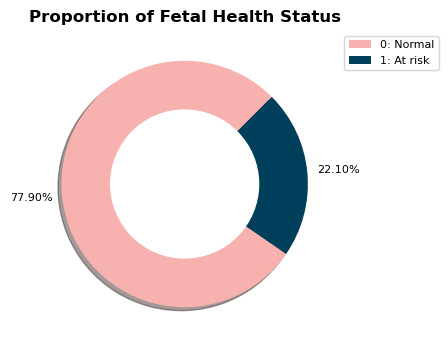

In [51]:
plt.figure(figsize=(4,4))

col=["#f7b2b0","#003f5c"]
plt.pie(df['fetal_health'].value_counts(), autopct='%.2f%%', pctdistance = 1.25,startangle=45, textprops={'fontsize': 8},
colors=col, shadow=True)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Proportion of Fetal Health Status', fontsize=12, fontweight='bold')
plt.legend(['0: Normal', '1: At risk'], bbox_to_anchor=(1, 1), fontsize=8)
plt.show()

Observation:

* It can be seen from the histogram above that there are far more `fetal_health` with a value of 0 (Normal) than those with a value of 1 (At Risk), so it is necessary to carry out imbalance handling
* I will choose the SMOTE method because the amount of data is small so it will avoid overfitting, besides that I also don't want duplicates in the dataset

In [52]:
# SMOTE Training data
X_train, y_train = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

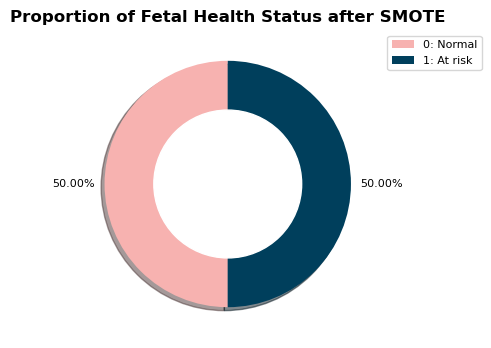

In [53]:
plt.figure(figsize=(4,4))

col=["#f7b2b0","#003f5c"]
plt.pie(y_train.value_counts(), autopct='%.2f%%', pctdistance = 1.25,startangle=90, textprops={'fontsize': 8},
colors=col, shadow=True)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Proportion of Fetal Health Status after SMOTE', fontsize=12, fontweight='bold')
plt.legend(['0: Normal', '1: At risk'], bbox_to_anchor=(1, 1), fontsize=8)
plt.show()

In [54]:
%%time
list_model = [LogisticRegression(random_state=42),
              KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=42), 
              RandomForestClassifier(random_state=42),
              GaussianNB(),
              svm.SVC(random_state=42) 
]

df_eval1 = pd.DataFrame(columns = ['Methods','recall train', 'recall test'])

for model in list_model:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]
    
    #recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    df_eval1 = df_eval1.append({'Methods': method, 'recall train':recall_train, 'recall test':recall_test}, ignore_index=True)
    
df_eval1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axi

Wall time: 2.39 s


<timed exec>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Methods,recall train,recall test
0,LogisticRegression,0.815972,0.807143
1,KNeighborsClassifier,0.991319,0.842857
2,DecisionTreeClassifier,0.998264,0.864286
3,RandomForestClassifier,0.999132,0.914286
4,GaussianNB,0.868924,0.871429
5,SVC,0.841146,0.857143


Note:
* I only do SMOTE for the train data so that the test data that we test in this model truly represents the original data
* The train data is already balanced (target) so that the model performance will be better and can use the accuracy evaluation matrix
* There is an increase in model performance after the imbalance handling process

#### 5. Hyperarameter tuning Random Forest

In [55]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [56]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (20,50,100,150,200),
    'min_samples_split': (2,4,6,8,10)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

Wall time: 1min 5s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_split': (2, 4, 6, 8, 10),
                         'n_estimators': (20, 50, 100, 150, 200)},
             scoring='recall')

In [57]:
# the results of Random Forest
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
9,"{'min_samples_split': 4, 'n_estimators': 200}",0.980011,1
12,"{'min_samples_split': 6, 'n_estimators': 100}",0.980011,2
7,"{'min_samples_split': 4, 'n_estimators': 100}",0.979142,3
13,"{'min_samples_split': 6, 'n_estimators': 150}",0.979138,4
2,"{'min_samples_split': 2, 'n_estimators': 100}",0.979134,5


In [58]:
# the best model
print(f'The best model is {rf_clf_gridcv.best_estimator_}')

The best model is RandomForestClassifier(min_samples_split=4, n_estimators=200, random_state=42)


In [59]:
%%time
list_model = [rf_clf_gridcv.best_estimator_]

df_eval1 = pd.DataFrame(columns = ['Methods','recall train', 'recall test', 'accuracy train', 'accuracy test'])

for model in list_model:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    method = str(type(model)).split('.')[-1][:-2]
    
    #recall
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    #accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    df_eval1 = df_eval1.append({'Methods': method, 
                                'recall train':recall_train, 
                                'recall test':recall_test, 
                                'accuracy train':acc_train, 
                                'accuracy test':acc_test}, ignore_index=True)
    
df_eval1

Wall time: 1.05 s


<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Methods,recall train,recall test,accuracy train,accuracy test
0,RandomForestClassifier,0.999132,0.921429,0.998698,0.960568


Observation:

* In the Random Forest Hyperparameter tuning model I use 2 parameters, namely the number of trees (`n_estimators`) and the allowed tree height (`min_samples_split`)
* The best model performance with the combination {`min_samples_split`: 4, `n_estimators`: 200} which resulted in a recall value of 92.14% and accuracy 96.05%
* There is increase model performance from 87.59% to 92.14% (**+4.58%**)

# Evaluation

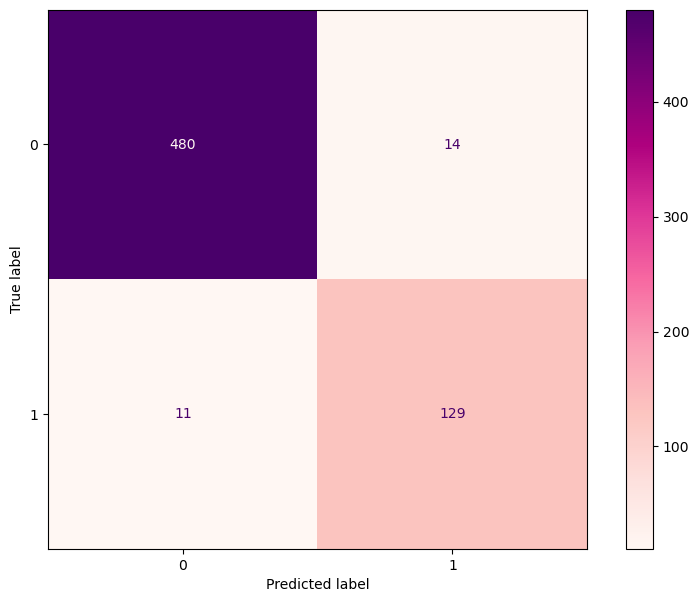

Recall score: 92.14%


In [60]:
# plotting confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax, cmap="RdPu")
plt.show()

recall_final = 'Recall score: {:.2f}%'.format(recall_score(y_test, y_pred)*100)
print(recall_final)

* 0 : Normal 
* 1 : Berisiko 

Observation 

* 480 -> 480 with true label Normal, predicted Normal = (**True Negative**)
* 14 -> 14 with true label Normal, predicted risky = (**False Positive**)
* 11 -> 11 with true labels are risky, predicted Normal = (**False Negative**)
* 129 -> 129 with true label risk, predicted risk = (**True Positive**)

In [61]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       494
           1       0.90      0.92      0.91       140

    accuracy                           0.96       634
   macro avg       0.94      0.95      0.94       634
weighted avg       0.96      0.96      0.96       634



**Positive class for fetal health is 'Risky' and negative class is 'Normal'.**

* With the best model in this project we get a recall value of 92.14%, this is a pretty good model for predicting fetal health. Referring to our initial goal to obtain a model that is able to minimize false negative values because this concerns maternal-fetal health, we therefore use the principle that prevention is better than cure.
* A recall value of 92.14% means that out of 100 fetuses that are truly at risk, our model is able to detect 92 of them
* Even though we focused on a model with a high recall value, the model worked quite well with a precision of 90%, which means that out of 100 fetuses predicted to be at risk, there were 90 fetuses that were actually at risk. This is also shown by the F1 model score of 91%.
* An accuracy value of 96.05% means that our model is able to correctly predict fetal health in 96 out of 100 fetuses.

In [62]:
final_model = rf_clf_gridcv.best_estimator_

final_model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [63]:
feature_imp = pd.DataFrame(zip(X.columns, final_model.feature_importances_))
feature_imp = feature_imp.rename({0:'Feature Name', 1:'Importance'}, axis = 'columns')
feature_imp = feature_imp.sort_values(by=['Importance'], ascending = [False]).reset_index(drop = True)
feature_imp.head()

,Feature Name,Importance
0,abnormal_short_term_variability,0.153508
1,accelerations,0.115053
2,mean_value_of_short_term_variability,0.113514
3,abnormal_long_term_variability,0.083859
4,histogram_mean,0.073146


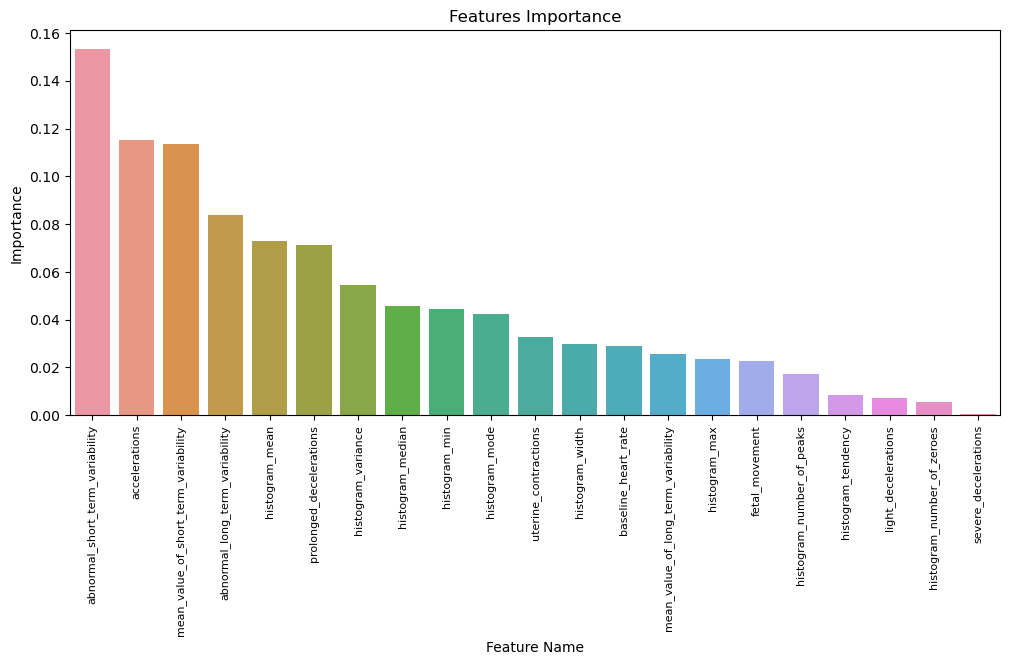

In [73]:
plt.figure(figsize=(12, 5))
sns.barplot(x=feature_imp['Feature Name'], y=feature_imp['Importance'])
plt.xticks(rotation = 90, fontsize=8)
plt.title('Features Importance', fontsize=12)
plt.show()

## Conclusion & Recomendation

**Conclusion**

After going through several stages of pre-processing, a machine learning model to predict fetal health status using cardiotocography data with good performance can be built. The random forest model with parameters min_samples_split: 4, n_estimators: 200 is the best model with a recall value of 92.14% and an accuracy of 96.05%. It is hoped that the automation of cardiotocogram analysis using machine learning and the knowledge of obstetricians can determine the health condition of the fetus quickly and precisely so that the treatment taken will be appropriate and the fetal death rate can be reduced.

**Recommendation**

1. I suggest applying machine learning in automating cardiotocogram analysis so that it makes it easier for obstetricians and can analyze it quickly so that cardiotocography tests can be carried out more frequently.

2. It is necessary to add a dataset with various types of cardiotocograph equipment and geographical locations, this will provide a universal picture and more insight into the machine learning model so that its performance will be better and more valid.

3. I recommend that healthcare providers pay attention to abnormal short term variability, acceleration, and mean value of short term variability as these are the strongest predictors of fetal health risk.